In [1]:
from IPython.core.interactiveshell import InteractiveShell

# pretty print only the last output of the cell
#InteractiveShell.ast_node_interactivity = "last_expr"
# pretty print all cell's output and not just the last one
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from IPython.display import Markdown, display
def printmd(string, color=None):
    if color:
        colorstr = "<span style='color:{}'>{}</span>".format(color, string)
        display(Markdown(colorstr))
    else:
        display(Markdown(string))

#printmd("## title text")
#printmd("**bold text**")
#printmd("**bold and blue**", color="blue")

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import seaborn as sns
#import plotly.plotly as py
#import plotly
#plotly.offline.init_notebook_mode() # run at the start of every notebook
import scipy
import statsmodels.api as sm # statistical modeling
import altair as alt
import vega_datasets

print(plt.style.available)
plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = 8, 4

['seaborn-deep', 'seaborn-dark-palette', 'dark_background', 'Solarize_Light2', 'seaborn-poster', 'tableau-colorblind10', 'seaborn-white', 'seaborn-darkgrid', 'seaborn-whitegrid', 'seaborn-paper', '_classic_test', 'grayscale', 'seaborn-muted', 'classic', 'seaborn-talk', 'seaborn', 'bmh', 'seaborn-notebook', 'seaborn-ticks', 'ggplot', 'seaborn-colorblind', 'seaborn-bright', 'fivethirtyeight', 'seaborn-pastel', 'fast', 'seaborn-dark']


In [4]:
df_raw = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df_raw.describe()
df1 = df_raw.drop(['Lat', 'Long'], axis=1)
# the hard way to see Santa Clara
df1.loc[(df1['Country/Region']=='US') & (df1['Province/State']=='Santa Clara County, CA'), :].head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,...,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,32.472246,-38.240308,1.255656,1.477376,2.128959,3.244344,4.791855,6.622172,12.619910,13.950226,...,221.452489,230.280543,239.414027,248.404977,256.925339,268.307692,284.762443,290.368778,328.490950,353.171946
std,18.243160,80.488626,21.171051,21.257000,26.477289,36.865436,51.533686,69.443788,170.220759,171.323903,...,3231.736307,3245.454795,3259.270219,3272.375630,3287.815469,3300.662870,3327.040627,3334.956867,3408.758787,3472.648781
min,-41.454500,-157.858400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.517325,-94.614125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.194900,-75.247900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,42.328900,18.981425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,3.000000,4.000000,6.000000,7.000000,8.750000,11.750000,17.000000,25.750000,30.750000
max,64.963100,174.886000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,67466.000000,67592.000000,67666.000000,67707.000000,67743.000000,67760.000000,67773.000000,67781.000000,67786.000000,67790.000000


,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
316,"Santa Clara County, CA",US,0,0,0,0,0,0,0,0,...,20,20,32,38,38,0,0,0,0,0


In [98]:
# easier to set as index
di = df1.set_index(['Country/Region', 'Province/State'])
di.loc[(['US'], ['California','New York']),].head(10)

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
Country/Region Province/State                                                
US             New York              0        0        0        0        0   
               California            0        0        0        0        0   

                               1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  \
Country/Region Province/State                                                
US             New York              0        0        0        0        0   
               California            0        0        0        0        0   

                               ...  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  \
Country/Region Province/State  ...                                           
US             New York        ...       0       0       0       0       0   
               California      ...       0       0       0       0       0   

                               3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  
Country/Region Province/State                                               
US             New York            173      220      328      421      525  
               California          144      177      221      282      340  

[2 rows x 53 columns]

In [99]:
di = di.stack()
di.head()


Country/Region  Province/State         
Thailand        NaN             1/22/20    2
                                1/23/20    3
                                1/24/20    5
                                1/25/20    7
                                1/26/20    8
dtype: int64

In [100]:
df = di.unstack(level=[0,1])
df.head()

Country/Region Thailand Japan Singapore Nepal Malaysia           Canada  \
Province/State      NaN   NaN       NaN   NaN      NaN British Columbia   
1/22/20               2     2         0     0        0                0   
1/23/20               3     1         1     0        0                0   
1/24/20               5     2         3     0        0                0   
1/25/20               7     2         3     1        3                0   
1/26/20               8     4         4     1        4                0   

Country/Region       Australia                     Cambodia  ... Gabon  \
Province/State New South Wales Victoria Queensland      NaN  ...   NaN   
1/22/20                      0        0          0        0  ...     0   
1/23/20                      0        0          0        0  ...     0   
1/24/20                      0        0          0        0  ...     0   
1/25/20                      0        0          0        0  ...     0   
1/26/20                      3        1          0        0  ...     0   

Country/Region Guatemala Guernsey Mauritania Rwanda Saint Lucia  \
Province/State       NaN      NaN        NaN    NaN         NaN   
1/22/20                0        0          0      0           0   
1/23/20                0        0          0      0           0   
1/24/20                0        0          0      0           0   
1/25/20                0        0          0      0           0   
1/26/20                0        0          0      0           0   

Country/Region Saint Vincent and the Grenadines Suriname                   US  \
Province/State                              NaN      NaN Virgin Islands, U.S.   
1/22/20                                       0        0                    0   
1/23/20                                       0        0                    0   
1/24/20                                       0        0                    0   
1/25/20                                       0        0                    0   
1/26/20                                       0        0                    0   

Country/Region occupied Palestinian territory  
Province/State                            NaN  
1/22/20                                     0  
1/23/20                                     0  
1/24/20                                     0  
1/25/20                                     0  
1/26/20                                     0  

[5 rows x 442 columns]

In [101]:
df.loc[:,[('US', 'California'), ('US', 'Santa Clara County, CA')]].head()
df.loc[:,(['US'], ['California', 'Santa Clara County, CA'])].head()
df.loc[:,pd.IndexSlice[:,['California', 'Santa Clara County, CA']]].head()
idx = pd.IndexSlice
df.loc['3/1/20':,idx[:,['California', 'Santa Clara County, CA']]]

Country/Region         US                       
Province/State California Santa Clara County, CA
1/22/20                 0                      0
1/23/20                 0                      0
1/24/20                 0                      0
1/25/20                 0                      0
1/26/20                 0                      0

Country/Region         US                       
Province/State California Santa Clara County, CA
1/22/20                 0                      0
1/23/20                 0                      0
1/24/20                 0                      0
1/25/20                 0                      0
1/26/20                 0                      0

Country/Region         US                       
Province/State California Santa Clara County, CA
1/22/20                 0                      0
1/23/20                 0                      0
1/24/20                 0                      0
1/25/20                 0                      0
1/26/20                 0                      0

Country/Region         US                       
Province/State California Santa Clara County, CA
3/1/20                  0                      3
3/2/20                  0                      9
3/3/20                  0                     11
3/4/20                  0                     11
3/5/20                  0                     20
3/6/20                  0                     20
3/7/20                  0                     32
3/8/20                  0                     38
3/9/20                  0                     38
3/10/20               144                      0
3/11/20               177                      0
3/12/20               221                      0
3/13/20               282                      0
3/14/20               340                      0

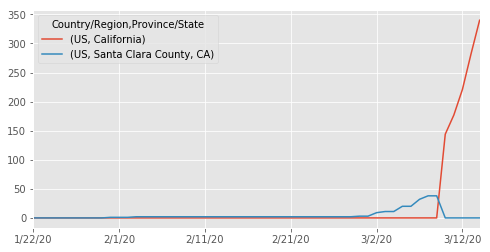

In [102]:
df.loc[:,pd.IndexSlice[:,['California', 'Santa Clara County, CA']]].plot()

In [103]:
df.columns

MultiIndex([(                        'Thailand',                    nan),
            (                           'Japan',                    nan),
            (                       'Singapore',                    nan),
            (                           'Nepal',                    nan),
            (                        'Malaysia',                    nan),
            (                          'Canada',     'British Columbia'),
            (                       'Australia',      'New South Wales'),
            (                       'Australia',             'Victoria'),
            (                       'Australia',           'Queensland'),
            (                        'Cambodia',                    nan),
            ...
            (                           'Gabon',                    nan),
            (                       'Guatemala',                    nan),
            (                        'Guernsey',                    nan),
            (         

In [104]:
idx = pd.IndexSlice
df.columns.levels[1]
# The following produces a list of booleans
#     df.columns.levels[1].str.contains(", CA")
# but for use with the .loc[:, idx[]] construct below, I need a list of
# column names instead (not a list of booleans, because the list of booleans
# is not the same size as the level 1 multi-index list)
# so, first take this step to define the list of names into cal_locations
cal_locations = df.columns.levels[1][df.columns.levels[1].str.contains(", CA")]
cal_locations
# now use that list of locations to dereference the multi-indexed df
df.loc[:, idx[:, cal_locations]]
# now sum to get a summation of California
df.loc[:, idx[:, cal_locations]].sum(axis=1)

Index(['Adams, IN', 'Alabama', 'Alachua, FL', 'Alameda County, CA', 'Alaska',
       'Alberta', 'Anhui', 'Anoka, MN', 'Arapahoe, CO', 'Arizona',
       ...
       'Western Australia', 'Whatcom, WA', 'Williamson County, TN',
       'Wisconsin', 'Worcester, MA', 'Wyoming', 'Xinjiang', 'Yolo County, CA',
       'Yunnan', 'Zhejiang'],
      dtype='object', name='Province/State', length=305)

Index(['Alameda County, CA', 'Calaveras, CA', 'Contra Costa County, CA',
       'Fresno County, CA', 'Humboldt County, CA', 'Los Angeles, CA',
       'Madera County, CA', 'Marin, CA', 'Napa, CA', 'Orange County, CA',
       'Placer County, CA', 'Riverside County, CA', 'Sacramento County, CA',
       'San Benito, CA', 'San Diego County, CA', 'San Francisco County, CA',
       'San Joaquin, CA', 'San Mateo, CA', 'Santa Clara County, CA',
       'Santa Cruz, CA', 'Shasta County, CA', 'Solano, CA',
       'Sonoma County, CA', 'Stanislaus, CA', 'Ventura, CA',
       'Yolo County, CA'],
      dtype='object', name='Province/State')

Country/Region         US                                      \
Province/State Solano, CA Santa Cruz, CA Napa, CA Ventura, CA   
1/22/20                 0              0        0           0   
1/23/20                 0              0        0           0   
1/24/20                 0              0        0           0   
1/25/20                 0              0        0           0   
1/26/20                 0              0        0           0   
1/27/20                 0              0        0           0   
1/28/20                 0              0        0           0   
1/29/20                 0              0        0           0   
1/30/20                 0              0        0           0   
1/31/20                 0              0        0           0   
2/1/20                  0              0        0           0   
2/2/20                  0              0        0           0   
2/3/20                  0              0        0           0   
2/4/20                  0              0        0           0   
2/5/20                  0              0        0           0   
2/6/20                  0              0        0           0   
2/7/20                  0              0        0           0   
2/8/20                  0              0        0           0   
2/9/20                  0              0        0           0   
2/10/20                 0              0        0           0   
2/11/20                 0              0        0           0   
2/12/20                 0              0        0           0   
2/13/20                 0              0        0           0   
2/14/20                 0              0        0           0   
2/15/20                 0              0        0           0   
2/16/20                 0              0        0           0   
2/17/20                 0              0        0           0   
2/18/20                 0              0        0           0   
2/19/20                 0              0        0           0   
2/20/20                 0              0        0           0   
2/21/20                 0              0        0           0   
2/22/20                 0              0        0           0   
2/23/20                 0              0        0           0   
2/24/20                 0              0        0           0   
2/25/20                 0              0        0           0   
2/26/20                 0              0        0           0   
2/27/20                 0              0        0           0   
2/28/20                 0              0        0           0   
2/29/20                 0              0        0           0   
3/1/20                  0              0        0           0   
3/2/20                  0              0        0           0   
3/3/20                  0              0        0           0   
3/4/20                  0              0        0           0   
3/5/20                  0              0        0           0   
3/6/20                  0              0        0           0   
3/7/20                  0              0        0           0   
3/8/20                  0              0        0           0   
3/9/20                  0              0        0           0   
3/10/20                 0              0        0           0   
3/11/20                 0              0        0           0   
3/12/20                 0              0        0           0   
3/13/20                 0              0        0           0   
3/14/20                 0              0        0           0   

Country/Region                                                           \
Province/State Shasta County, CA Fresno County, CA Riverside County, CA   
1/22/20                        0                 0                    0   
1/23/20                        0                 0                    0   
1/24/20                        0                 0                    0   
1/25/20                        0                 

1/22/20      0
1/23/20      0
1/24/20      0
1/25/20      0
1/26/20      2
1/27/20      2
1/28/20      2
1/29/20      2
1/30/20      2
1/31/20      3
2/1/20       3
2/2/20       3
2/3/20       6
2/4/20       6
2/5/20       6
2/6/20       6
2/7/20       6
2/8/20       6
2/9/20       6
2/10/20      6
2/11/20      7
2/12/20      7
2/13/20      8
2/14/20      8
2/15/20      8
2/16/20      8
2/17/20      8
2/18/20      8
2/19/20      8
2/20/20      8
2/21/20     10
2/22/20     10
2/23/20     10
2/24/20     10
2/25/20     10
2/26/20     10
2/27/20     11
2/28/20     11
2/29/20     12
3/1/20      12
3/2/20      21
3/3/20      25
3/4/20      35
3/5/20      51
3/6/20      59
3/7/20      81
3/8/20      95
3/9/20     101
3/10/20      0
3/11/20      0
3/12/20      0
3/13/20      0
3/14/20      0
dtype: int64

In [105]:
idx = pd.IndexSlice
cal_locations = df.columns.levels[1][df.columns.levels[1].str.contains(", CA")]
cal_locations = list(cal_locations.values)
cal_locations.append('California')
df.loc[:, idx[:, cal_locations]].sum(axis=1)
#df[('US', 'California_merged')] = df.loc[:, idx[:, cal_locations]].sum(axis=1)
cal_merged = df.loc[:, idx[:, cal_locations]].sum(axis=1)
df.info()
df.describe()

1/22/20      0
1/23/20      0
1/24/20      0
1/25/20      0
1/26/20      2
1/27/20      2
1/28/20      2
1/29/20      2
1/30/20      2
1/31/20      3
2/1/20       3
2/2/20       3
2/3/20       6
2/4/20       6
2/5/20       6
2/6/20       6
2/7/20       6
2/8/20       6
2/9/20       6
2/10/20      6
2/11/20      7
2/12/20      7
2/13/20      8
2/14/20      8
2/15/20      8
2/16/20      8
2/17/20      8
2/18/20      8
2/19/20      8
2/20/20      8
2/21/20     10
2/22/20     10
2/23/20     10
2/24/20     10
2/25/20     10
2/26/20     10
2/27/20     11
2/28/20     11
2/29/20     12
3/1/20      12
3/2/20      21
3/3/20      25
3/4/20      35
3/5/20      51
3/6/20      59
3/7/20      81
3/8/20      95
3/9/20     101
3/10/20    144
3/11/20    177
3/12/20    221
3/13/20    282
3/14/20    340
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 1/22/20 to 3/14/20
Columns: 442 entries, (Thailand, nan) to (occupied Palestinian territory, nan)
dtypes: int64(442)
memory usage: 185.9+ KB


Country/Region   Thailand       Japan   Singapore      Nepal    Malaysia  \
Province/State        NaN         NaN         NaN        NaN         NaN   
count           53.000000   53.000000   53.000000  53.000000   53.000000   
mean            33.603774  172.698113   73.490566   0.943396   38.018868   
std             17.124364  213.253153   56.053759   0.233295   51.431243   
min              2.000000    1.000000    0.000000   0.000000    0.000000   
25%             25.000000   22.000000   24.000000   1.000000   10.000000   
50%             35.000000   66.000000   77.000000   1.000000   22.000000   
75%             42.000000  256.000000  106.000000   1.000000   29.000000   
max             82.000000  773.000000  212.000000   1.000000  238.000000   

Country/Region           Canada       Australia                        \
Province/State British Columbia New South Wales   Victoria Queensland   
count                 53.000000        53.00000  53.000000  53.000000   
mean                   9.962264        13.90566   6.886792   7.358491   
std                   14.825864        23.69864   8.639490   8.380596   
min                    0.000000         0.00000   0.000000   0.000000   
25%                    1.000000         4.00000   4.000000   3.000000   
50%                    5.000000         4.00000   4.000000   5.000000   
75%                    8.000000         6.00000   7.000000   9.000000   
max                   64.000000       112.00000  49.000000  46.000000   

Country/Region   Cambodia  ...      Gabon  Guatemala   Guernsey Mauritania  \
Province/State        NaN  ...        NaN        NaN        NaN        NaN   
count           53.000000  ...  53.000000  53.000000  53.000000  53.000000   
mean             1.226415  ...   0.018868   0.018868   0.018868   0.018868   
std              1.120465  ...   0.137361   0.137361   0.137361   0.137361   
min              0.000000  ...   0.000000   0.000000   0.000000   0.000000   
25%              1.000000  ...   0.000000   0.000000   0.000000   0.000000   
50%              1.000000  ...   0.000000   0.000000   0.000000   0.000000   
75%              1.000000  ...   0.000000   0.000000   0.000000   0.000000   
max              7.000000  ...   1.000000   1.000000   1.000000   1.000000   

Country/Region     Rwanda Saint Lucia Saint Vincent and the Grenadines  \
Province/State        NaN         NaN                              NaN   
count           53.000000   53.000000                        53.000000   
mean             0.018868    0.018868                         0.018868   
std              0.137361    0.137361                         0.137361   
min              0.000000    0.000000                         0.000000   
25%              0.000000    0.000000                         0.000000   
50%              0.000000    0.000000                         0.000000   
75%              0.000000    0.000000                         0.000000   
max              1.000000    1.000000                         1.000000   

Country/Region   Suriname                   US occupied Palestinian territory  
Province/State        NaN Virgin Islands, U.S.                            NaN  
count           53.000000            53.000000                           53.0  
mean             0.018868             0.018868                            0.0  
std              0.137361             0.137361                            0.0  
min              0.000000             0.000000                            0.0  
25%              0.000000             0.000000                            0.0  
50%              0.000000             0.000000                            0.0  
75%              0.000000             0.000000                            0.0  
max              1.000000             1.000000                            0.0  

[8 rows x 442 columns]

1/22/20      0
1/23/20      0
1/24/20      0
1/25/20      0
1/26/20      2
1/27/20      2
1/28/20      2
1/29/20      2
1/30/20      2
1/31/20      3
2/1/20       3
2/2/20       3
2/3/20       6
2/4/20       6
2/5/20       6
2/6/20       6
2/7/20       6
2/8/20       6
2/9/20       6
2/10/20      6
2/11/20      7
2/12/20      7
2/13/20      8
2/14/20      8
2/15/20      8
2/16/20      8
2/17/20      8
2/18/20      8
2/19/20      8
2/20/20      8
2/21/20     10
2/22/20     10
2/23/20     10
2/24/20     10
2/25/20     10
2/26/20     10
2/27/20     11
2/28/20     11
2/29/20     12
3/1/20      12
3/2/20      21
3/3/20      25
3/4/20      35
3/5/20      51
3/6/20      59
3/7/20      81
3/8/20      95
3/9/20     101
3/10/20    144
3/11/20    177
3/12/20    221
3/13/20    282
3/14/20    340
dtype: int64

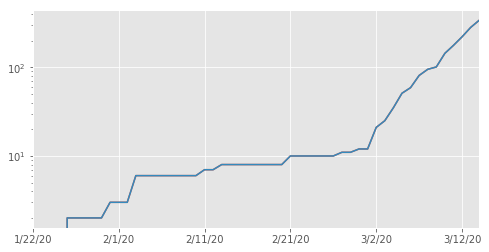

In [106]:
cal_merged
cal_merged.plot()
cal_merged.plot(logy=True)

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20'],
      dtype='object')

1/22/20      2
1/23/20      1
1/24/20      2
1/25/20      2
1/26/20      4
1/27/20      4
1/28/20      7
1/29/20      7
1/30/20     11
1/31/20     15
2/1/20      20
2/2/20      20
2/3/20      20
2/4/20      22
2/5/20      22
2/6/20      45
2/7/20      25
2/8/20      25
2/9/20      26
2/10/20     26
2/11/20     26
2/12/20     28
2/13/20     28
2/14/20     29
2/15/20     43
2/16/20     59
2/17/20     66
2/18/20     74
2/19/20     84
2/20/20     94
2/21/20    105
2/22/20    122
2/23/20    147
2/24/20    159
2/25/20    170
2/26/20    189
2/27/20    214
2/28/20    228
2/29/20    241
3/1/20     256
3/2/20     274
3/3/20     293
3/4/20     331
3/5/20     360
3/6/20     420
3/7/20     461
3/8/20     502
3/9/20     511
3/10/20    581
3/11/20    639
3/12/20    639
3/13/20    701
3/14/20    773
dtype: int64

,California,France,Iran,Italy,Japan,Singapore,US
1/22/20,0,0,0,0,2,0,1
1/23/20,0,0,0,0,1,1,1
1/24/20,0,2,0,0,2,3,2
1/25/20,0,3,0,0,2,3,2
1/26/20,2,3,0,0,4,4,5
1/27/20,2,3,0,0,4,5,5
1/28/20,2,4,0,0,7,7,5
1/29/20,2,5,0,0,7,7,5
1/30/20,2,5,0,0,11,10,5
1/31/20,3,5,0,2,15,13,7


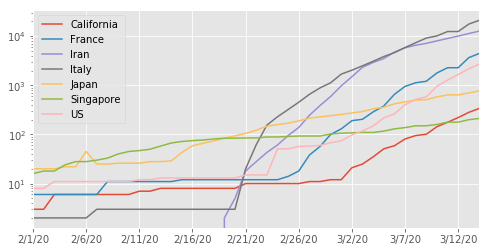

In [108]:
df.index
df.loc[:, idx['Japan',:]].sum(axis=1)
idx = pd.IndexSlice
newdf = pd.DataFrame(index = df.index,
                     data = {
                         'Japan': df.loc[:, idx['Japan',:]].sum(axis=1),
                         'US': df.loc[:, idx['US',:]].sum(axis=1),
                         'Singapore': df.loc[:, idx['Singapore',:]].sum(axis=1),
                         'Italy': df.loc[:, idx['Italy',:]].sum(axis=1),
                         'Iran': df.loc[:, idx['Iran',:]].sum(axis=1),
                         'France': df.loc[:, idx['France',:]].sum(axis=1),
                         'California': cal_merged,
                     }

)
newdf
newdf.loc['2/1/20':,:].plot(logy=True)

In [ ]:
locations = ['Japan', 'United States', 'Singapore', 'Italy', 'Iran', 'France',
            'Spain', 'Germany', 'Switzerland', 'United Kingdom', 'South Korea',
            'Taiwan', 'Philippines', 'Ireland', 'California', 'New York', 
            'Utah', 'Hawaii']
metrics = ['cases', 'population', 'cases_per_10k']
col_index = pd.MultiIndex.from_product([locations, metrics], names=('location', 'metric'))